In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('white')

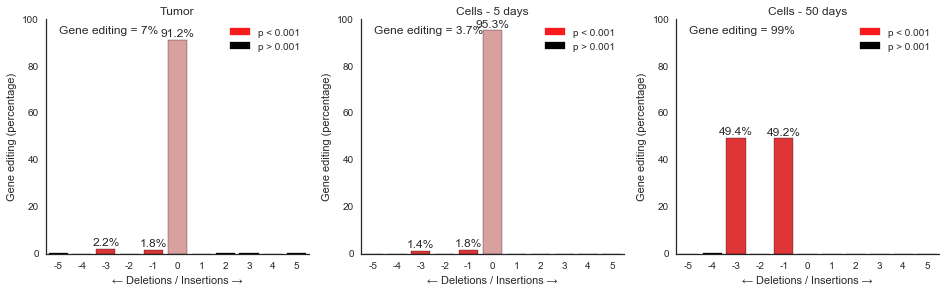

In [3]:
from nbsupport import tide

fig, axes = plt.subplots(ncols=3, figsize=(16, 4.2))

data_tumor = pd.read_csv('../data/raw/sb/tide/myh9_tumor.txt', sep='\t')
tide.plot(data_tumor, overall_efficiency=7, ax=axes[0])
axes[0].set_title('Tumor')

data_5_days = pd.read_csv('../data/raw/sb/tide/myh9_5_days.txt', sep='\t')
tide.plot(data_5_days, overall_efficiency=3.7, ax=axes[1])
axes[1].set_title('Cells - 5 days')

data_50_days = pd.read_csv('../data/raw/sb/tide/myh9_50_days.txt', sep='\t')
tide.plot(data_50_days, overall_efficiency=99, ax=axes[2])
axes[2].set_title('Cells - 50 days')

for ax in axes:
    ax.set_xlim(4.5, 15.5)

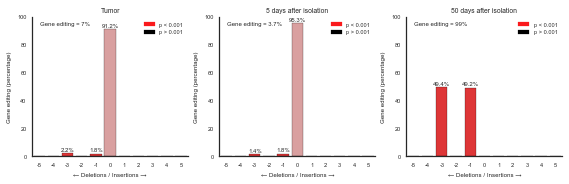

In [5]:
# Plot again for paper.
with sns.plotting_context('paper', font_scale=0.7): 
    fig, axes = plt.subplots(ncols=3, figsize=(9.5, 2.5))

    tide.plot(data_tumor, overall_efficiency=7, 
              ax=axes[0], label_kws={'fontsize': 6})
    axes[0].set_title('Tumor')

    tide.plot(data_5_days, overall_efficiency=3.7,
              ax=axes[1], label_kws={'fontsize': 6})
    axes[1].set_title('5 days after isolation')

    tide.plot(data_50_days, overall_efficiency=99,
              ax=axes[2], label_kws={'fontsize': 6})
    axes[2].set_title('50 days after isolation')

    for ax in axes:
        ax.set_xlim(4.5, 15.5)
        
    fig.savefig('../reports/figures/fig_7e_tide.pdf', bbox_inches='tight')